In [1]:
import sys, os

import pandas as pd
import numpy as np

import pickle as pkl

sys.path.insert(0, "../")
from enrichment import *

# 1. Import annotation files

In [2]:
from goatools.associations import read_gaf

# Import GO annotations from http://geneontology.org/gene-associations/goa_human.gaf.gz
goatools_annotations = read_gaf("goa_human.gaf")

  READ 417,076 associations: goa_human.gaf


In [3]:
# Import GO BP 2015 database - Associations
# Get ftp://ftp.ncbi.nlm.nih.gov/gene/DATA/gene2go.gz

enrichr_annotations = {}
with open("GO_Biological_Process_2015.txt", 'rb') as f:
    for line in f.readlines():
        tmp = line.rstrip('\n').split('\t')
        key = tmp[0].split("(")[1].rstrip(")")
        vals = tmp[2:-1]
        enrichr_annotations[key] = vals

# 2. Compare annotation files

In [22]:
pathway_union = list(set(goatools_annotations) | set(enrichr_annotations))
pathway_intersection = list(set(goatools_annotations) & set(enrichr_annotations))

print "Number of pathways in goatools:", len(goatools_annotations)
print "Number of pathways in enrichr: ", len(enrichr_annotations)
print "Number of pathways in both:    ", len(pathway_intersection)

Number of pathways in goatools: 17181
Number of pathways in enrichr:  5190
Number of pathways in both:     4183


In [26]:
# Compare pathway sizes for pathways in either 
arr = []

for key in pathway_union:
    if key in goatools_annotations: 
        goatools_len = len(goatools_annotations[key])
    else:
        goatools_len = 0
    
    if key in enrichr_annotations:
        enrichr_len = len(enrichr_annotations[key])
    else:
        enrichr_len = 0
        
    arr.append([key, np.log2(goatools_len+1), np.log2(enrichr_len+1)])
    
df = pd.DataFrame(arr, columns=["pathway", "goatools", "enrichr"])

(0, 10)

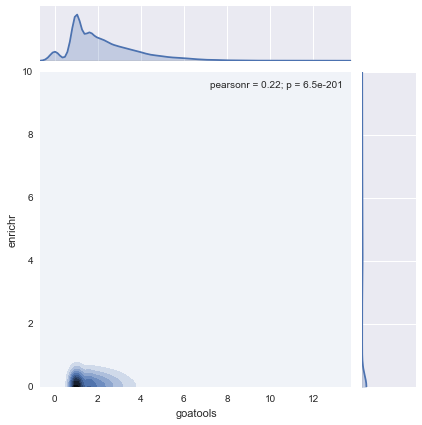

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.jointplot(x="goatools", y="enrichr", data=df, kind="kde")
plt.xlim([0,10])
plt.ylim([0,10])

In [23]:
# Compare pathway sizes for pathways in both 
arr = []

for key in pathway_intersection:
    goatools_len = len(goatools_annotations[key])
    enrichr_len = len(enrichr_annotations[key])
        
    arr.append([key, np.log2(goatools_len), np.log2(enrichr_len)])
    
df = pd.DataFrame(arr, columns=["pathway", "goatools", "enrichr"])

(0, 10)

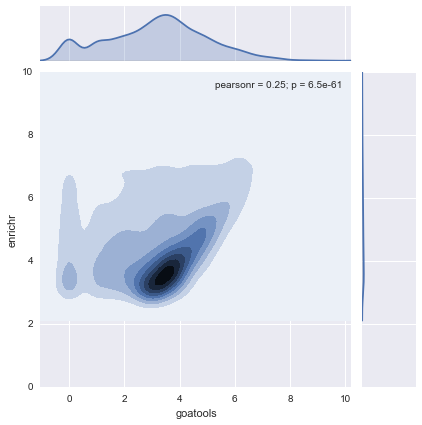

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.jointplot(x="goatools", y="enrichr", data=df, kind="kde")
plt.xlim([0,10])
plt.ylim([0,10])